In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
print(test.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

* MSSubClass: The building class
 
* MSZoning: The general zoning classification
 
* LotFrontage: Linear feet of street connected to property
 
* LotArea: Lot size in square feet
 
* Street: Type of road access
 
* Alley: Type of alley access
 
* LotShape: General shape of property
 
* LandContour: Flatness of the property
 
* Utilities: Type of utilities available
 
* LotConfig: Lot configuration
 
* LandSlope: Slope of property
 
* Neighborhood: Physical locations within Ames city limits
 
* Condition1: Proximity to main road or railroad
 
* Condition2: Proximity to main road or railroad (if a second is present)
 
* BldgType: Type of dwelling
 
* HouseStyle: Style of dwelling
 
* OverallQual: Overall material and finish quality
 
* OverallCond: Overall condition rating
 
* YearBuilt: Original construction date
 
* YearRemodAdd: Remodel date

* RoofStyle: Type of roof
 
* RoofMatl: Roof material
 
* Exterior1st: Exterior covering on house
 
* Exterior2nd: Exterior covering on house (if more than one material)
 
* MasVnrType: Masonry veneer type
 
* MasVnrArea: Masonry veneer area in square feet
 
* ExterQual: Exterior material quality
 
* ExterCond: Present condition of the material on the exterior

* Foundation: Type of foundation
 
* |BsmtQual: Height of the basement
 
* BsmtCond: General condition of the basement
 
* BsmtExposure: Walkout or garden level basement walls
 
* BsmtFinType1: Quality of basement finished area
 
* BsmtFinSF1: Type 1 finished square feet
 
* BsmtFinType2: Quality of second finished area (if present)
 
* BsmtFinSF2: Type 2 finished square feet
 
* BsmtUnfSF: Unfinished square feet of basement area
 
* TotalBsmtSF: Total square feet of basement area
 
* Heating: Type of heating
 
* HeatingQC: Heating quality and condition
 
* CentralAir: Central air conditioning
 
* Electrical: Electrical system
 
* 1stFlrSF: First Floor square feet
 
* 2ndFlrSF: Second floor square feet
 
* LowQualFinSF: Low quality finished square feet (all floors)
 
* GrLivArea: Above grade (ground) living area square feet
 
* BsmtFullBath: Basement full bathrooms
 
* BsmtHalfBath: Basement half bathrooms
 
* FullBath: Full bathrooms above grade
 
* HalfBath: Half baths above grade
 
* Bedroom: Number of bedrooms above basement level
 
* Kitchen: Number of kitchens
 
* KitchenQual: Kitchen quality

* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

* Functional: Home functionality rating
 
* Fireplaces: Number of fireplaces
 
* FireplaceQu: Fireplace quality
 
* GarageType: Garage location
 
* GarageYrBlt: Year garage was built
 
* GarageFinish: Interior finish of the garage
 
* GarageCars: Size of garage in car capacity
 
* GarageArea: Size of garage in square feet
 
* GarageQual: Garage quality
 
* GarageCond: Garage condition
 
* PavedDrive: Paved driveway
 
* WoodDeckSF: Wood deck area in square feet
 
* OpenPorchSF: Open porch area in square feet
 
* EnclosedPorch: Enclosed porch area in square feet
 
* 3SsnPorch: Three season porch area in square feet
 
* ScreenPorch: Screen porch area in square feet
 
* PoolArea: Pool area in square feet
 
* PoolQC: Pool quality
 
* Fence: Fence quality

* MiscFeature: Miscellaneous feature not covered in other categories

* MiscVal: Value of miscellaneous feature

* MoSold: Month Sold
 
* YrSold: Year Sold
 
* SaleType: Type of sale

* SaleCondition: Condition of sale

In [6]:
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (1460, 81)
test shape: (1459, 80)


Clearly seeing that test data is missing the sales price column, that needs to calculated by us

As seen in the above data, most of the columns have no null values, except LotFrontage
As the comparsion of values present in that column to the entire column is too low, thus the best thing to do is to remove the column itself.

In [7]:
df = pd.concat([train,test],ignore_index=True)
print("Combined data shape",df.shape)
print("\n")
print("Combined data info",df.info())

Combined data shape (2919, 81)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919

Columns that have missing data and the amount of data that is missing:
* LotFrontage: 482
* Alley: 2717
* Utilities: 2
* Exterior1st: 1
* Exterior2nd: 1
* MasVnrType: 20
* MasVnrArea: 19
* BsmtQual: 77
* BsmtCond: 76
* BsmtExposure: 76
* BsmtFinType1: 79
* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, KitchenQual, GarageCars, GarageArea, SaleType : 1
* BsmtFinType2: 80
* BsmtFullBath, BsmtHalfBath, Functional: 2
* FireplaceQu: 1420
* GarageType: 157
* GarageYrBlt, GarageFinish, GarageQual, GarageCond: 159
* PoolQC: 2909
* Fence: 2348
* MiscFeature: 2814

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

<AxesSubplot:>

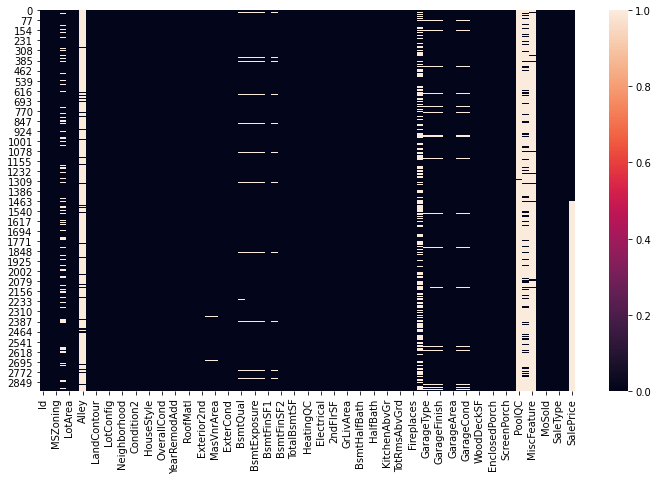

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [12]:
df_main = df.copy()

In [13]:
df = df.drop(['Id','Alley', 'PoolQC','MiscFeature','Fence'], axis=1)

In [14]:
df = df.drop('FireplaceQu', axis=1)

<AxesSubplot:>

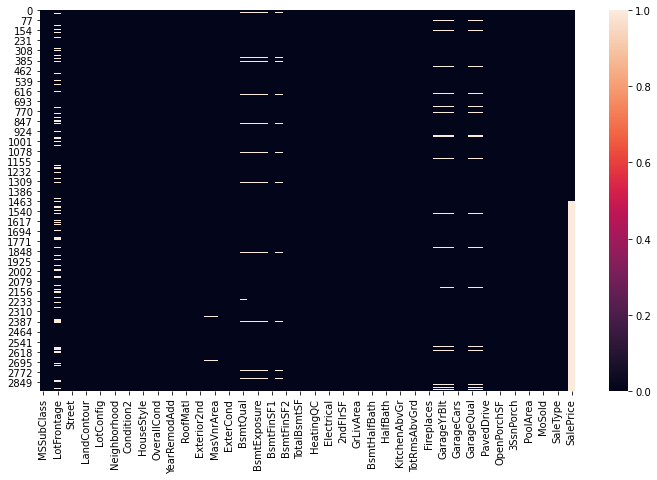

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [17]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [18]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

<AxesSubplot:>

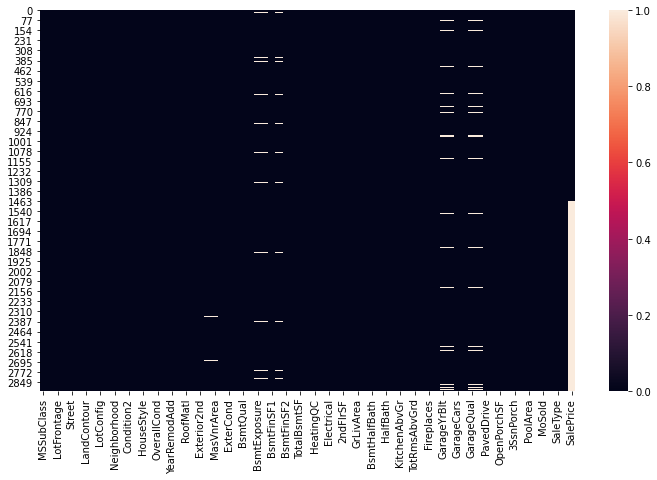

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [20]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

<AxesSubplot:>

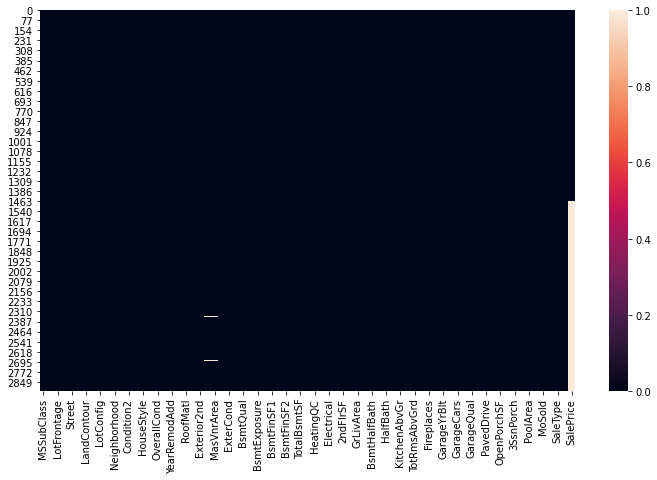

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [22]:
y = df['SalePrice']
df = df.drop('SalePrice', axis=1)

<AxesSubplot:>

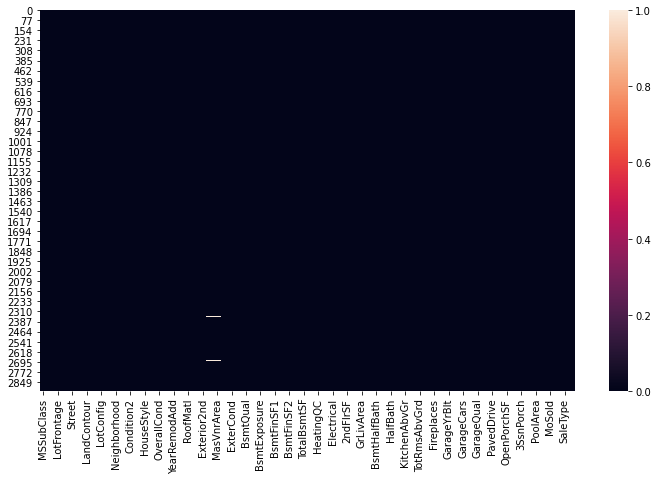

In [23]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())
#df.dropna(inplace=True)

In [24]:
#df.dropna(inplace=True)

<AxesSubplot:>

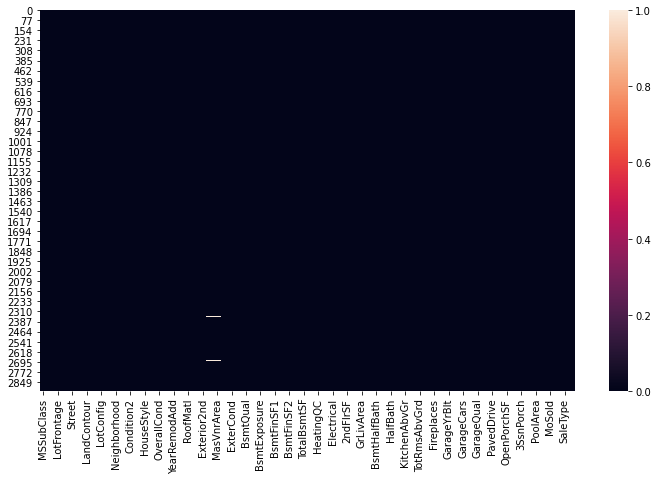

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [26]:
df = df.join(y, how='left')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,NaN


## Recognising Outliers

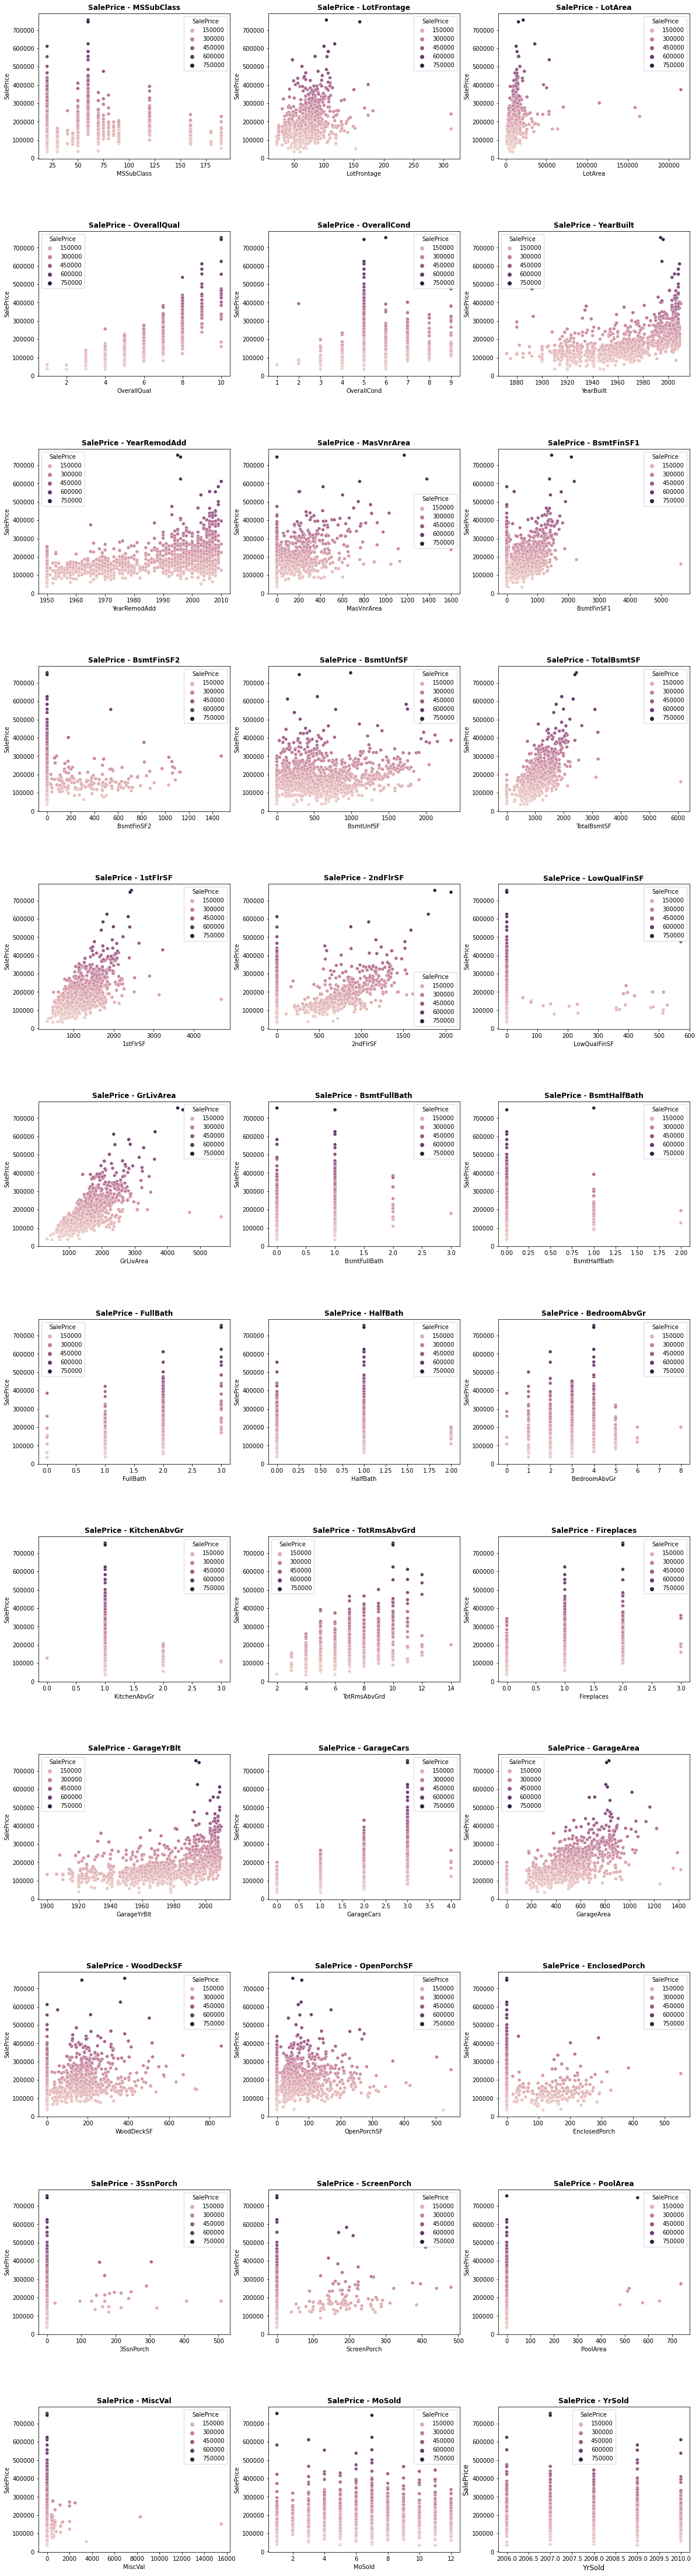

In [27]:
df_number = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
fig.subplots_adjust(hspace = 0.5)
for i,ax in zip(df_number.columns, axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_number, ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)
    ax.set_title('SalePrice'+' - '+str(i), fontweight='bold', fontsize=12)

From the observations above we understand
* Lot Area for a few is vast in size but its costings is much less, the reason of this could be unfavourable land, weather, crimes etc.
* Most sales depends on the area of its first floor, and second floor but most houses are observed to not a second floor.
* We see 2 outliers in Ground living area where the costing it too low for its ground area, the same reason of lot area can be used here

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

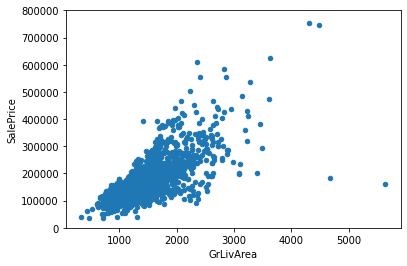

In [28]:
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), cmap='viridis')

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

In [29]:
drop_indexes = df[df['SalePrice']>700000]
df = df.drop(drop_indexes.index, axis= 0)

In [30]:
sum_missing_values = df.select_dtypes(include=[np.number]).isnull().sum()
sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

SalePrice       1459
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64

In [31]:
df.shape

(2917, 75)

### Splitting Test and Train

In [32]:
X = df.iloc[:1458,:]
test_1 = df.iloc[1458:,:]

In [33]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [34]:
test_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,NaN
1461,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,NaN
1462,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,NaN
1463,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,NaN
1464,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,NaN


## Data Visualisation

<AxesSubplot:>

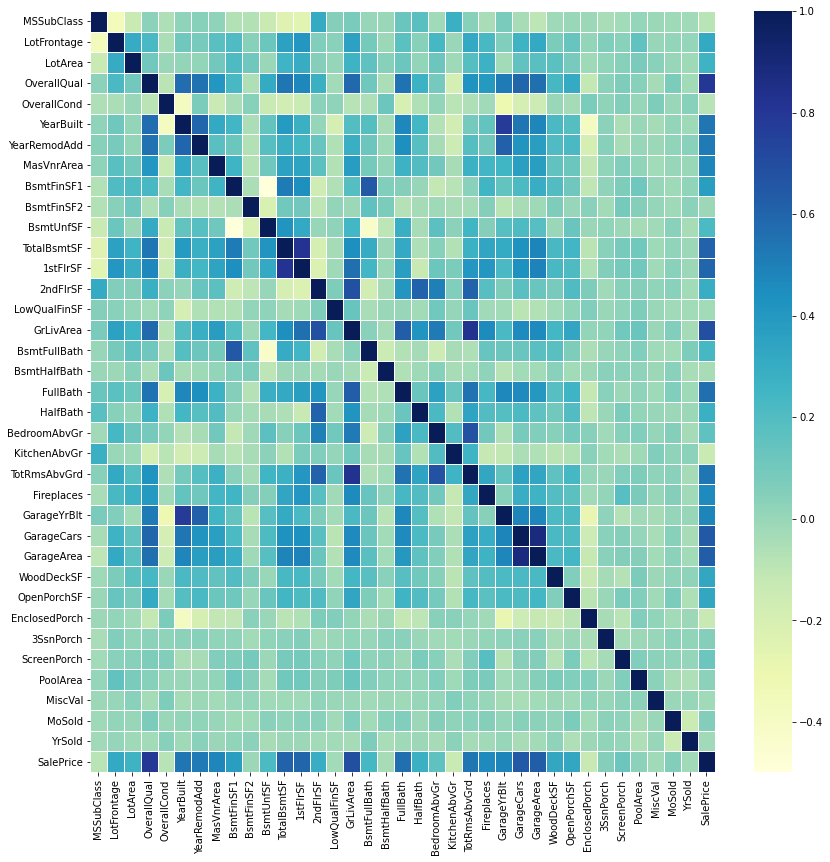

In [35]:
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(X.corr(), linewidths=.5, cmap="YlGnBu")

In [36]:
correlation = X.select_dtypes(include=[np.number]).corr()
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.795998
GrLivArea        0.693557
GarageCars       0.648619
GarageArea       0.631105
TotalBsmtSF      0.608769
1stFlrSF         0.599437
FullBath         0.557558
YearBuilt        0.534565
TotRmsAbvGrd     0.533410
YearRemodAdd     0.520809
GarageYrBlt      0.481726
MasVnrArea       0.473574
Fireplaces       0.463831
BsmtFinSF1       0.373394
OpenPorchSF      0.324981
WoodDeckSF       0.322200
LotFrontage      0.320754
2ndFlrSF         0.296177
HalfBath         0.282453
LotArea          0.265529
BsmtFullBath     0.234342
BsmtUnfSF        0.220701
BedroomAbvGr     0.160512
ScreenPorch      0.118353
MoSold           0.057095
3SsnPorch        0.047429
PoolArea         0.028637
BsmtFinSF2      -0.008859
MiscVal         -0.021084
YrSold          -0.023740
LowQualFinSF    -0.025333
BsmtHalfBath    -0.036757
OverallCond     -0.080113
MSSubClass      -0.088168
EnclosedPorch   -0.129709
KitchenAbvGr    -0.138811
Name: SalePrice, dtype: float64


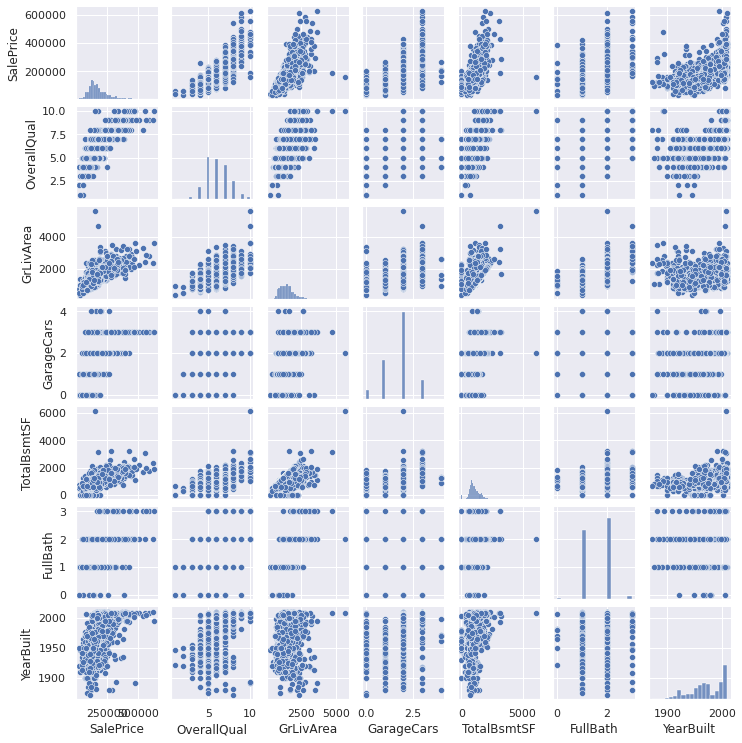

In [37]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(X[cols], size = 1.5)
plt.show();

Skewness is : 1.567321
Kurtosis is : 3.894915


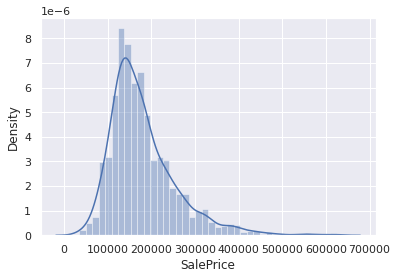

In [38]:
sns.distplot(X['SalePrice'])
print('Skewness is : %f' % X['SalePrice'].skew())
print('Kurtosis is : %f' % X['SalePrice'].kurt())

From the pyplot we can clearly understand the following relations
* Sales Price and Ground Living Area are directly proportionate that means, the larger the area of the living room more the costing of the house.
* The steep slope against sales price and Total Basement in Square Feet, that a certain Basement area is preferred thus its costing is the most
* Ground Living area shows a direct proportion with Total Basement in square feet, thus indicating that usually bigger area homes have bigger basements

In [39]:
fig = px.scatter(X, x = 'TotRmsAbvGrd', y = 'SalePrice')
fig.show()

Usually 5-9 have similar Price Ranges. This thus inidicates that a lot of people do not consider the total rooms when looking at house sale price

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

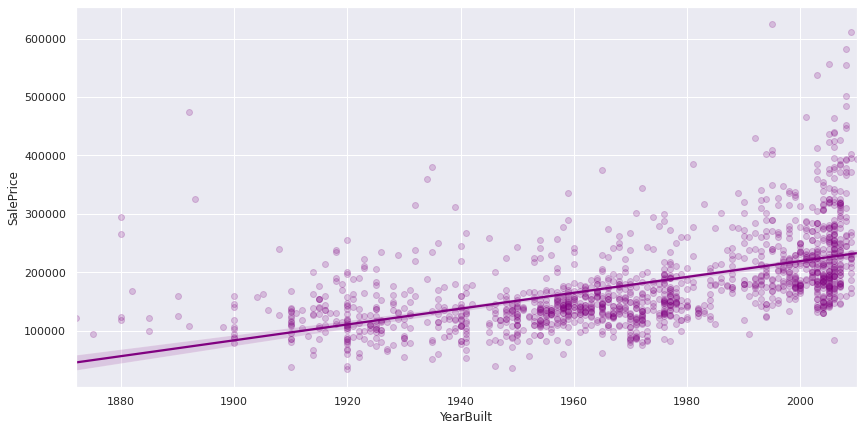

In [40]:
fig,ax=plt.subplots(figsize=(14,7))
sns.regplot(data=X, x='YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2}, color='purple')

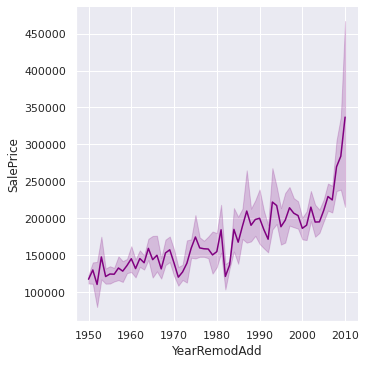

In [41]:
sns.relplot(data=X, x='YearRemodAdd', y='SalePrice', color='purple', kind="line")

In [42]:
fig = px.pie(X, names='Neighborhood',title = "Neighborhood area")
fig.update_layout(margin=dict(t=45, b=0, l=0, r=0))
fig.show()

We clearly see that Northern Ames is where maximum houses are sold, and the reason for this is that it is a safe living area, with less crimes and good education facility. This is unlike Blueste as this is an area filled with crime and not a completely safe area to live in

In [43]:
fig = px.pie(X, names='GarageType',title = "Garage area")
fig.show()

In [44]:
fig = px.pie(X, names='SaleType',title = "Type of Sale")
fig.update_layout(margin=dict(t=45, b=0, l=0, r=0))
fig.show()

In [45]:
fig =px.bar(X,x='ExterQual', y='SalePrice',barmode='group', height=600)
fig.show()

In [46]:
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(X['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.89560696]
 [-1.8902428 ]
 [-1.85645247]
 [-1.83818037]
 [-1.82904432]
 [-1.67242635]
 [-1.6659006 ]
 [-1.63327185]
 [-1.63327185]
 [-1.62031172]]

outer range (high) of the distribution:
[[3.73741957]
 [3.84835731]
 [3.97887229]
 [4.19862036]
 [4.67060168]
 [4.89247715]
 [4.91311156]
 [5.25704464]
 [5.63193587]
 [5.80608201]]


1. the low or the negative values are close to zero so that means they might be within the range of distribution
2. The necessary outliers are already removed so leaving these values untouched

## Modeling

In [47]:
x = X.drop(['SalePrice'], axis=1)
y = X['SalePrice']

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = x.apply(le.fit_transform)

In [49]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,327,1,3,3,0,4,0,...,49,0,0,0,0,0,1,2,8,4
1,0,3,52,498,1,3,3,0,2,0,...,0,0,0,0,0,0,4,1,8,4
2,5,3,39,702,1,0,3,0,4,0,...,30,0,0,0,0,0,8,2,8,4
3,6,3,31,489,1,0,3,0,0,0,...,24,108,0,0,0,0,1,0,8,0
4,5,3,56,925,1,0,3,0,2,0,...,70,0,0,0,0,0,11,2,8,4


In [50]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

def model_eval(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mae

## Linear Regression

In [54]:
from sklearn import linear_model
lr = linear_model.LinearRegression().fit(X_train, y_train)
cv = cross_val_score(lr, X_train, y_train, cv=10)
y_pred = lr.predict(X_test)
cv = np.mean(cv)
print("Cross val score = "+str(cv))
r2, mae = model_eval(y_test, y_pred)   # model_eval is the function in the above code block in order to calculate r2 score and mean absolute error
print("R^2 score = "+str(r2))
print("MAE score = "+str(mae))
test_accuracy_score=lr.score(X_test,y_test)
print("test accuracy score = " +str(test_accuracy_score))

Cross val score = 0.8349802357507636
R^2 score = 0.8126923695971509
MAE score = 20721.900796082104
test accuracy score = 0.8126923695971509


from linear regression we can see the negative r2 score which means that the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

## Ridge Regression

In [55]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=1).fit(X_train,y_train)
cv = cross_val_score(ridge, X_train, y_train, cv=10)
y_pred = ridge.predict(X_test)
cv = np.mean(cv)
print("Cross val score = "+str(cv))
r2, mae = model_eval(y_test, y_pred)   # model_eval is the function in the above code block in order to calculate r2 score and mean absolute error
print("R^2 score = "+str(r2))
print("MAE score = "+str(mae))
test_accuracy_score=ridge.score(X_test,y_test)
print("test accuracy score = " +str(test_accuracy_score))

Cross val score = 0.8360905742041288
R^2 score = 0.8128985376783464
MAE score = 20713.222978384543
test accuracy score = 0.8128985376783464


## Lasso Regression

In [56]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=1).fit(X_train,y_train)
cv = cross_val_score(lasso, X_train, y_train, cv=10)
y_pred = lasso.predict(X_test)
cv = np.mean(cv)
print("Cross val score = "+str(cv))
r2, mae = model_eval(y_test, y_pred)   # model_eval is the function in the above code block in order to calculate r2 score and mean absolute error
print("R^2 score = "+str(r2))
print("MAE score = "+str(mae))
test_accuracy_score=lasso.score(X_test,y_test)
print("test accuracy score = " +str(test_accuracy_score))

Cross val score = 0.8358147151310751
R^2 score = 0.8127238896796178
MAE score = 20719.764704982
test accuracy score = 0.8127238896796178


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000).fit(X_train,y_train)
cv = cross_val_score(rfr, X_train, y_train, cv=10)
y_pred = rfr.predict(X_test)
cv = np.mean(cv)
print("Cross val score = "+str(cv))
r2, mae = model_eval(y_test, y_pred)   # model_eval is the function in the above code block in order to calculate r2 score and mean absolute error
print("R^2 score = "+str(r2))
print("MAE score = "+str(mae))
test_accuracy_score=rfr.score(X_test,y_test)
print("test accuracy score = " +str(test_accuracy_score))

Cross val score = 0.8498929502443888
R^2 score = 0.8576053896734236
MAE score = 16851.181883817426
test accuracy score = 0.8576053896734236


## Gradient Booster

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train,y_train)
cv = cross_val_score(gbr, X_train, y_train, cv=10)
y_pred = gbr.predict(X_test)
cv = np.mean(cv)
print("Cross val score = "+str(cv))
r2, mae = model_eval(y_test, y_pred)   # model_eval is the function in the above code block in order to calculate r2 score and mean absolute error
print("R^2 score = "+str(r2))
print("MAE score = "+str(mae))
test_accuracy_score=gbr.score(X_test,y_test)
print("test accuracy score = " +str(test_accuracy_score))

Cross val score = 0.8590918409453145
R^2 score = 0.8614501945688788
MAE score = 16613.224819008876
test accuracy score = 0.8614501945688788


In [59]:
import xgboost as XGB
xgb = XGB.XGBRegressor(learning_rate=0.01, n_estimators=1000, objective='reg:squarederror', random_state = 31).fit(X_train,y_train) #trial and error
cv = cross_val_score(xgb, X_train, y_train, cv = 10)
y_pred = xgb.predict(X_test)
cv = np.mean(cv)
print("Cross val score: " + str(cv))
r2, mae = model_eval(y_test, y_pred)
print("R^2 score: " + str(r2))
print("MAE score: " + str(mae))
test_accuracy_score=xgb.score(X_test,y_test)
print("test accuracy score = " +str(test_accuracy_score))

Cross val score: 0.8598323103631449
R^2 score: 0.8946654988040899
MAE score: 15616.977583635891
test accuracy score = 0.8946654988040899


## Predicting test data

In [60]:
test_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,NaN
1461,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,NaN
1462,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,NaN
1463,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,NaN
1464,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,NaN


In [61]:
test_2 = test_1.drop('SalePrice', axis=1)

In [62]:
test_2 = test_2.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [63]:
test_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,5,2,96,187,1,3,3,0,4,0,...,0,0,0,12,0,0,8,4,8,4
1461,5,3,97,374,1,0,3,0,0,0,...,134,0,0,0,0,3,8,4,8,4
1462,10,3,90,357,1,0,3,0,4,0,...,131,0,0,0,0,0,5,4,8,4
1463,10,3,94,1103,1,0,3,0,4,0,...,134,0,0,0,0,0,8,4,8,4
1464,0,3,58,631,1,0,1,0,4,0,...,187,0,0,21,0,0,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2,4,39,491,1,3,3,0,4,0,...,0,0,0,0,0,0,8,0,8,4
2915,2,4,39,488,1,3,3,0,4,0,...,103,0,0,0,0,0,6,0,8,0
2916,5,3,36,500,1,3,3,0,4,0,...,0,0,0,0,0,0,11,0,8,0
2917,14,3,77,57,1,3,3,0,4,0,...,128,0,0,0,0,22,9,0,8,4


In [64]:
test_pred = xgb.predict(test_2)

## Submission

In [65]:
my_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
final_sub = {'Id': my_submission.Id, 'SalePrice': test_pred}
final_sub

{'Id': 0       1461
 1       1462
 2       1463
 3       1464
 4       1465
         ... 
 1454    2915
 1455    2916
 1456    2917
 1457    2918
 1458    2919
 Name: Id, Length: 1459, dtype: int64,
 'SalePrice': array([249511.17, 240544.61, 244386.66, ..., 251293.77, 241242.56,
        232530.77], dtype=float32)}

In [66]:
my_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
final_sub = {'Id': my_submission.Id, 'SalePrice': test_pred}
final_submission = pd.DataFrame(data=final_sub)
final_submission.to_csv('submission_file.csv',index =False)